In [1]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.data.path.append('/kaggle/input/tweetsmou/archive (1)/nltk-data')
df_train = pd.read_csv('/kaggle/input/tweetsmou/tweet_eval_train.csv')
df_val = pd.read_csv('/kaggle/input/tweetsmou/tweet_eval_validation.csv')
df_test = pd.read_csv('/kaggle/input/tweetsmou/tweet_eval_test.csv')

In [2]:
import re
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from nltk.corpus import wordnet
from itertools import chain
import random

def synonym_replace(text, prob=0.1):
    words = text.split()
    new_words = []
    
    for word in words:
        if random.uniform(0, 1) < prob:
            synonyms = wordnet.synsets(word)
            lemmas = set(chain.from_iterable([s.lemma_names() for s in synonyms]))
            lemmas = [lemma for lemma in lemmas if lemma.lower() != word.lower()]
            if lemmas:
                new_word = random.choice(list(lemmas))
                new_words.append(new_word.replace('_', ' '))
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    
    return ' '.join(new_words)


# Contraction mapping dictionary
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                    flags=re.IGNORECASE|re.DOTALL)
    
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match.lower(), match)
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Import spaCy and load the English model
import spacy
nlp = spacy.load("en_core_web_sm")

ORDINAL_MAP = {
    '1st': 'first', '2nd': 'second', '3rd': 'third',
    '4th': 'fourth', '5th': 'fifth', '6th': 'sixth',
    '7th': 'seventh', '8th': 'eighth', '9th': 'ninth',
    '10th': 'tenth', '11th': 'eleventh', '12th': 'twelfth',
    '13th': 'thirteenth', '14th': 'fourteenth', '15th': 'fifteenth',
    '20th': 'twentieth', '21st': 'twenty first', '22nd': 'twenty second',
    '23rd': 'twenty third', '24th': 'twenty fourth', '30th': 'thirtieth', '31st':'thirty first'
    
}

import re

def normalize_ordinals(text):
    def replace_ordinal(match):
        return ORDINAL_MAP.get(match.group(0).lower(), match.group(0))
    return re.sub(r'\b\d+(st|nd|rd|th)\b', replace_ordinal, text)

def preprocess_for_lstm(text, synonym_aug=False, aug_prob=0.1):
    import re
    import emoji
    from nltk.tokenize import TweetTokenizer
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'never'}
    lemmatizer = WordNetLemmatizer()

    # Step 1: Expand contractions
    text = expand_contractions(text)

    if synonym_aug:
        text = synonym_replace(text, prob=aug_prob)

    # Step 2: Convert emojis to clean text (e.g., 😂 -> emoji_face_with_tears_of_joy)
    text = emoji.demojize(text)
    text = re.sub(r':([a-zA-Z0-9_]+):', r'emoji_\1', text)

    # Step 3: Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Step 4: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Step 5: Remove mentions
    text = re.sub(r'@\w+', '', text)

    # Step 6: Remove hashtag symbols but keep the word
    text = re.sub(r'#', '', text)

    text = normalize_ordinals(text)

    # Step 7: Remove numbers
    text = re.sub(r'\d+', '', text)

    # Step 8: Remove punctuation except ! and ?, then replace with tags
    text = re.sub(r'[^\w\s!?]', '', text)
    text = text.replace('!', ' exclaim ')
    text = text.replace('?', ' question ')

    # Step 9: Reduce repeated characters
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Step 10: Tokenize
    tokens = tokenizer.tokenize(text)

    # Step 11: Apply negation handling
    def mark_negation(tokens):
        negation_words = {'not', 'no', 'never', "n't"}
        new_tokens = []
        negating = False
        for token in tokens:
            if token in negation_words:
                negating = True
                new_tokens.append(token)
            elif negating:
                new_tokens.append(token + '_NEG')
                if token in {'exclaim', 'question', '.', ','}:
                    negating = False
            else:
                new_tokens.append(token)
        return new_tokens

    tokens = mark_negation(tokens)

    # Step 12: Remove stopwords (keep negated words)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    # Step 13: Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(tokens)

In [3]:
df_train['clean_text'] = df_train['text'].apply(lambda x: preprocess_for_lstm(x, synonym_aug=True))
df_val['clean_text'] = df_val['text'].apply(preprocess_for_lstm)
df_test['clean_text'] = df_test['text'].apply(preprocess_for_lstm)

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [5]:
df_train[['text', 'clean_text']].sample(5)

,text,clean_text
26918,@user Thanks for your many tweets tonight Milan. Can't believe I was in the wrong place (MilansOfficial). You made all fans so happy.,thanks many tweet tonight milan cannot believe hoosier state wrong place milansofficial made fan happy
21614,@user tell everyone that is wanting to do Jags that we\u2019re starting pratices this Sunday from 3-6 at the Greenville gym.,tell everyone wanting jag weure starting pratices sunday greenville gym
9672,My beautiful bestfriend converted to Islam on Laylat Al Qadr may Allah bless her &amp; set her on the right path,beautiful bestfriend converted islam laylat al qadr may allah bless amp set proper path
13800,The Safeco Field roof is being closed as #Rangers open the 11th with back-to-back singles. Runners on the corners for Josh Hamilton.,safeco field roof live closed ranger open eleventh backtoback single base runner corner josh hamilton
11271,"""Galaxy S II can be wiped by just clicking a link, other TouchWiz devices may also be vulnerable | Th",galaxy sulphur ii wiped clicking link touchwiz device may also vulnerable thursday


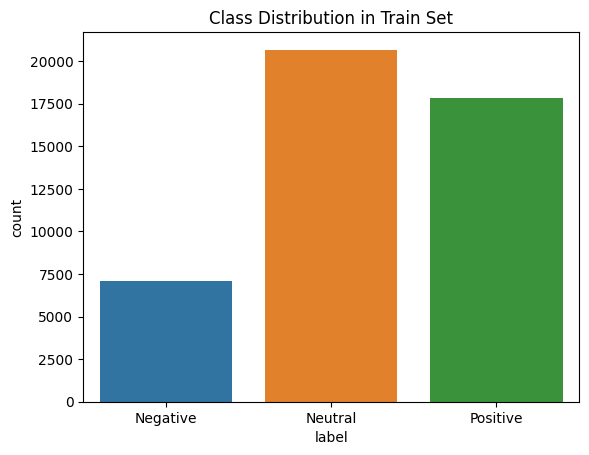

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_train, x='label')
plt.title("Class Distribution in Train Set")
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'])
plt.show()

In [7]:
from collections import Counter

def get_frequent_words(dataframe, label, n=10):
    words = ' '.join(dataframe[dataframe['label'] == label]['clean_text']).split()
    return Counter(words).most_common(n)

print("Top Positive Words:", get_frequent_words(df_train, 2))
print("Top Neutral Words:", get_frequent_words(df_train, 1))
print("Top Negative Words:", get_frequent_words(df_train, 0))

Top Positive Words: [('exclaim', 10871), ('tomorrow', 3295), ('day', 2135), ('question', 1984), ('may', 1879), ('first', 1369), ('see', 1351), ('night', 1336), ('not', 1317), ('going', 1117)]
Top Neutral Words: [('exclaim', 3956), ('question', 3732), ('tomorrow', 2662), ('may', 2423), ('not', 2218), ('first', 1641), ('day', 1345), ('night', 1169), ('going', 1099), ('sunday', 1085)]
Top Negative Words: [('not', 1698), ('may', 1286), ('exclaim', 1243), ('question', 1176), ('tomorrow', 732), ('first', 529), ('like', 424), ('day', 415), ('no', 372), ('get', 317)]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


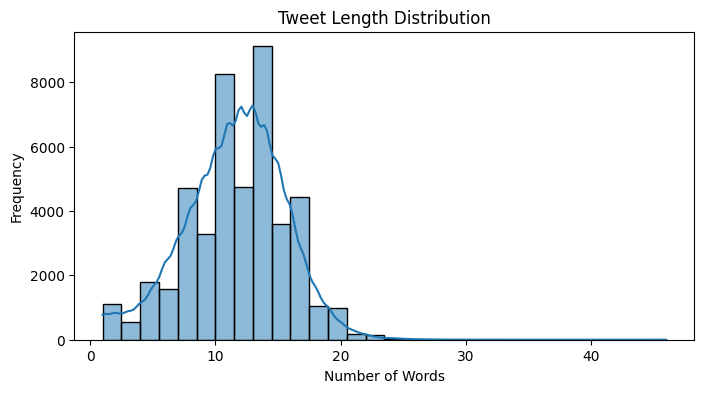

In [8]:
df_train['text_length'] = df_train['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
sns.histplot(df_train['text_length'], bins=30, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Parameters
vocab_size = 10000
max_length = 30
embedding_dim = 100
padding_type = 'post'
trunc_type = 'post'
oov_tok = "<OOV>"

# Tokenize - Fit only on training data to avoid data leakage
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train['clean_text'])

# Prepare training data (100% of df_train)
X_train = tokenizer.texts_to_sequences(df_train['clean_text'])
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_train = to_categorical(df_train['label'], num_classes=3)

# Prepare validation data
X_val = tokenizer.texts_to_sequences(df_val['clean_text'])
X_val = pad_sequences(X_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_val = to_categorical(df_val['label'], num_classes=3)

# Prepare test data
X_test = tokenizer.texts_to_sequences(df_test['clean_text'])
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)
y_test = to_categorical(df_test['label'], num_classes=3)

# Verify shapes
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

2025-04-30 22:59:11.529975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746053951.721263      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746053951.777271      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training data shape: (45615, 30)
Validation data shape: (2000, 30)
Test data shape: (12284, 30)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Remove input_length from Embedding
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim),  # Removed input_length
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Explicitly build model (optional)
lstm_model.build(input_shape=(None, max_length))

# Proceed with compilation and training
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()  # Now shows proper parameter counts

I0000 00:00:1746053966.632025      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 30, 100)             │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,046,595 (3.99 MB)

 Trainable params: 1,046,595 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

Epoch 1/20


I0000 00:00:1746054004.339793      78 cuda_dnn.cc:529] Loaded cuDNN version 90300


713/713 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5077 - loss: 0.9773 - val_accuracy: 0.6305 - val_loss: 0.8103
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6744 - loss: 0.7435 - val_accuracy: 0.6670 - val_loss: 0.7616
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7266 - loss: 0.6236 - val_accuracy: 0.6565 - val_loss: 0.7651
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7558 - loss: 0.5618 - val_accuracy: 0.6720 - val_loss: 0.7820
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7840 - loss: 0.4906 - val_accuracy: 0.6680 - val_loss: 0.8519
Epoch 6/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8091 - loss: 0.4273 - val_accuracy: 0.6525 - val_loss: 0.8818
Epoch 7/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8304 - loss: 0.3794 - val_accuracy: 0.6545 - val_loss: 0.9728
Epoch 8/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8528 - loss: 0.3269 - val_accuracy: 0.6510 - val_

In [12]:
lstm_model_better = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),  # First LSTM layer
    LSTM(64),                         # Second LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),                     # Regularization
    Dense(3, activation='softmax')
])

lstm_model_better.build(input_shape=(None, max_length))

# Proceed with compilation and training
lstm_model_better.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss'),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

history = lstm_model_better.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5101 - loss: 0.9695 - val_accuracy: 0.6655 - val_loss: 0.7588
Epoch 2/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6819 - loss: 0.7211 - val_accuracy: 0.6720 - val_loss: 0.7373
Epoch 3/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7229 - loss: 0.6395 - val_accuracy: 0.6675 - val_loss: 0.7405
Epoch 4/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7509 - loss: 0.5708 - val_accuracy: 0.6710 - val_loss: 0.8088
Epoch 5/20
713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7773 - loss: 0.5025 - val_accuracy: 0.6725 - val_loss: 0.8905


In [13]:
import pickle

# Path to your pickle file
glove_path = "/kaggle/input/glove-twitter-pickles-27b-25d-50d-100d-200d/glove.twitter.27B.100d.pkl"

# Load the GloVe embeddings
with open(glove_path, 'rb') as f:
    embedding_index = pickle.load(f)

print(f"Loaded {len(embedding_index)} word vectors.")


Loaded 1193514 word vectors.


In [14]:
import numpy as np

# Assuming you already have a Tokenizer and word_index from your texts
word_index = tokenizer.word_index

# Define embedding dimensions
embedding_dim = 100
num_words = min(10000, len(word_index) + 1)

# Create the embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= 10000:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Define the deeper LSTM model
model = Sequential()

# Embedding layer (pre-trained embeddings)
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=100,
                    trainable=False))  # Freeze embeddings

# First LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))  # Return sequences for the next LSTM layer

# Second LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a Dropout layer to avoid overfitting
model.add(Dropout(0.5))

# Add a Dense layer for learning complex relationships
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))  # Change 'num_classes' to the number of your classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set up the dynamic learning rate callback
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss for learning rate reduction
    factor=0.5,  # Reduce learning rate by a factor of 0.5
    patience=2,  # Number of epochs with no improvement before reducing LR
    verbose=1,  # Display the learning rate reduction in the logs
    min_lr=1e-6  # Minimum learning rate limit
)

# Set up the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=4,  # Number of epochs with no improvement before stopping
    verbose=1,  # Display the early stopping message in the logs
    restore_best_weights=True  # Restore the best model weights at the end of training
)

# Training loop with dynamic learning rate and early stopping
history = model.fit(
    X_train,  # Your training data (text data or pre-processed sequences)
    y_train,  # Your target labels (binary sentiment labels)
    epochs=50,  # Number of epochs
    batch_size=128,  # Choose a suitable batch size for your dataset
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[lr_reduction, early_stopping],  # List of callbacks (dynamic LR and early stopping)
    verbose=1  # Display progress (you can change it to 1 or 0 for less output)
)

# After training, print the final model summary or evaluate on test set
print("\nFinal Model Evaluation on Test Set:")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - accuracy: 0.5392 - loss: 0.9247 - val_accuracy: 0.6260 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.6042 - loss: 0.8384 - val_accuracy: 0.6500 - val_loss: 0.7796 - learning_rate: 0.0010
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.6226 - loss: 0.8102 - val_accuracy: 0.6470 - val_loss: 0.7748 - learning_rate: 0.0010
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.6266 - loss: 0.8005 - val_accuracy: 0.6550 - val_loss: 0.7564 - learning_rate: 0.0010
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.6389 - loss: 0.7841 - val_accuracy: 0.6500 - val_loss: 0.7609 - learning_rate: 0.0010
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6408 - loss: 0.7768 - val_accuracy: 0.6625 - val_loss: 0.7481 - learning_rate: 0.0010
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6491 - l

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Helper function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


==================== Simple LSTM ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
--- Validation Set Classification Report (Simple LSTM) ---
              precision    recall  f1-score   support

    Negative       0.51      0.40      0.45       312
     Neutral       0.60      0.70      0.65       869
    Positive       0.71      0.64      0.67       819

    accuracy                           0.63      2000
   macro avg       0.61      0.58      0.59      2000
weighted avg       0.63      0.63      0.63      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- Test Set Classification Report (Simple LSTM) ---
              precision    recall  f1-score   support

    Negative       0.58      0.37      0.45      3972
     Neutral       0.56      0.66      0.60      5937
    Positive       0.45      0.51      0.48      2375

    accuracy                           0.54     12284
   macro avg       0.53      0.52      0.51     12284
weighted avg       0.54      0.54      0.53   

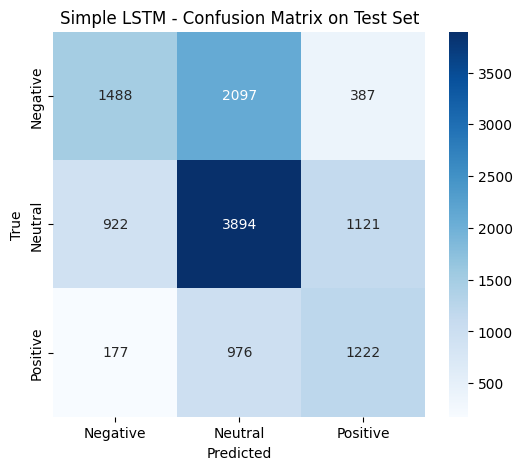


==================== Better LSTM ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
--- Validation Set Classification Report (Better LSTM) ---
              precision    recall  f1-score   support

    Negative       0.60      0.43      0.50       312
     Neutral       0.66      0.67      0.67       869
    Positive       0.70      0.76      0.73       819

    accuracy                           0.67      2000
   macro avg       0.65      0.62      0.63      2000
weighted avg       0.67      0.67      0.67      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- Test Set Classification Report (Better LSTM) ---
              precision    recall  f1-score   support

    Negative       0.65      0.37      0.48      3972
     Neutral       0.58      0.69      0.63      5937
    Positive       0.47      0.60      0.53      2375

    accuracy                           0.57     12284
   macro avg       0.57      0.55      0.54     12284
weighted avg       0.58      0.57      0.56   

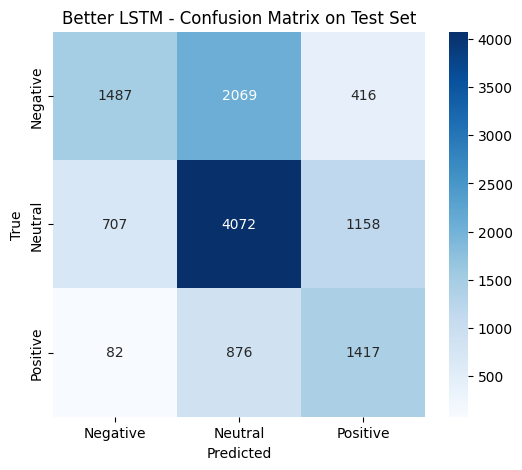


==================== GloVe LSTM ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
--- Validation Set Classification Report (GloVe LSTM) ---
              precision    recall  f1-score   support

    Negative       0.64      0.47      0.54       312
     Neutral       0.66      0.72      0.69       869
    Positive       0.74      0.74      0.74       819

    accuracy                           0.69      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.69      0.69      0.69      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step
--- Test Set Classification Report (GloVe LSTM) ---
              precision    recall  f1-score   support

    Negative       0.68      0.50      0.58      3972
     Neutral       0.62      0.72      0.67      5937
    Positive       0.57      0.61      0.59      2375

    accuracy                           0.63     12284
   macro avg       0.63      0.61      0.61     12284
weighted avg       0.63      0.63      0.62    

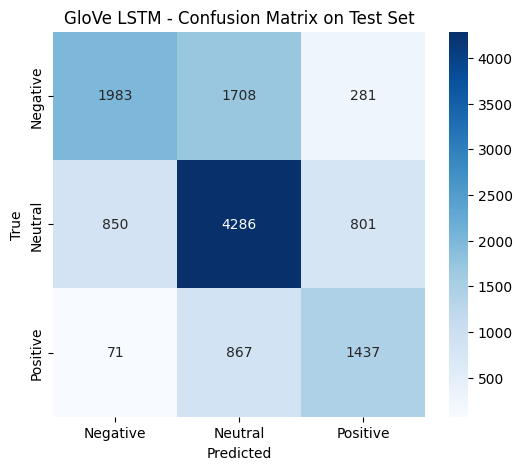

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Helper function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Prepare true labels
y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# LSTM Models
lstm_models = {
    "Simple LSTM": lstm_model,
    "Better LSTM": lstm_model_better,
    "GloVe LSTM": model
}

for name, model_obj in lstm_models.items():
    print(f"\n==================== {name} ====================")
    
    # Validation Set Evaluation
    y_val_pred = model_obj.predict(X_val)
    y_val_pred_labels = np.argmax(y_val_pred, axis=1)
    
    print(f"--- Validation Set Classification Report ({name}) ---")
    print(classification_report(y_val_labels, y_val_pred_labels, target_names=["Negative", "Neutral", "Positive"]))
    
    # Test Set Evaluation
    y_test_pred = model_obj.predict(X_test)
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)
    
    print(f"--- Test Set Classification Report ({name}) ---")
    print(classification_report(y_test_labels, y_test_pred_labels, target_names=["Negative", "Neutral", "Positive"]))
    
    # Plot confusion matrix for test set
    plot_conf_matrix(y_test_labels, y_test_pred_labels, title=f"{name} - Confusion Matrix on Test Set")


In [19]:
def preprocess_for_ffnn(text, synonym_aug=False, aug_prob=0.1):
    import re
    import emoji
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    # Define useful elements
    stop_words = set(stopwords.words('english'))
    tokenizer = word_tokenize

    # Step 0: Clean non-str input
    if not isinstance(text, str):
        return ""

    # Step 1: Lowercase
    text = text.lower()

    # Step 2: Expand contractions
    text = expand_contractions(text)

    # Step 3: Synonym augmentation (optional)
    if synonym_aug:
        text = synonym_replace(text, prob=aug_prob)

    # Step 4: Demojize and clean emojis
    text = emoji.demojize(text)
    text = re.sub(r':([a-zA-Z0-9_]+):', r'emoji_\1', text)

    # Step 5: Remove URLs, mentions, hashtags (keep only word)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)

    # Step 6: Normalize ordinals
    text = normalize_ordinals(text)

    # Step 7: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Step 8: Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Step 9: Normalize repeated characters (e.g., sooo -> soo)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Step 10: Tokenize and remove stopwords
    tokens = tokenizer(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    return " ".join(tokens)

In [20]:
df_train['clean_text'] = df_train['text'].apply(lambda x: preprocess_for_ffnn(x, synonym_aug=True))
df_val['clean_text'] = df_val['text'].apply(preprocess_for_ffnn)
df_test['clean_text'] = df_test['text'].apply(preprocess_for_ffnn)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_cleaned = df_train['clean_text'].values
X_val_cleaned = df_val['clean_text'].values
X_test_cleaned = df_test['clean_text'].values

# Vectorize the cleaned text using TF-IDF (or CountVectorizer) for FFNN input
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust features as needed

# Fit the vectorizer on the training data and transform the datasets
X_train_ff = vectorizer.fit_transform(X_train_cleaned).toarray()
X_val_ff = vectorizer.transform(X_val_cleaned).toarray()
X_test_ff = vectorizer.transform(X_test_cleaned).toarray()

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history = model.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


I0000 00:00:1746057493.993524      76 service.cc:148] XLA service 0x788e2c996330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746057493.994195      76 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 56/713 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4478 - loss: 1.6735

I0000 00:00:1746057495.669504      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


713/713 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5482 - loss: 1.1832 - val_accuracy: 0.6330 - val_loss: 1.0743 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6351 - loss: 1.0731 - val_accuracy: 0.6350 - val_loss: 1.0516 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6509 - loss: 1.0393 - val_accuracy: 0.6485 - val_loss: 1.0198 - learning_rate: 0.0010
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6612 - loss: 1.0091 - val_accuracy: 0.6475 - val_loss: 1.0196 - learning_rate: 0.0010
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6726 - loss: 0.9883 - val_accuracy: 0.6525 - val_loss: 1.0125 - learning_rate: 0.0010
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6816 - loss: 0.9697 - val_accuracy: 0.6510 - val_loss: 1.0051 - learning_rate: 0.0010
Epoch 7/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6971 - loss: 0.9490 - val_accurac

In [24]:
# Callbacks for dynamic learning rate and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model
history = model.fit(
    X_train_ff, y_train,
    epochs=50,  # You can increase epochs based on your dataset size
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test_ff, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7774 - loss: 0.7674 - val_accuracy: 0.6655 - val_loss: 0.9534 - learning_rate: 2.5000e-04
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8013 - loss: 0.7030 - val_accuracy: 0.6640 - val_loss: 0.9566 - learning_rate: 2.5000e-04
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8188 - loss: 0.6714 - val_accuracy: 0.6645 - val_loss: 0.9619 - learning_rate: 2.5000e-04
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8380 - loss: 0.6395 - val_accuracy: 0.6675 - val_loss: 0.9705 - learning_rate: 2.5000e-04
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8437 - loss: 0.6248 - val_accuracy: 0.6610 - val_loss: 0.9841 - learning_rate: 2.5000e-04
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.5956 - val_accuracy: 0.6560 - val_loss: 0.9993 - learning_rate: 2.5000e-04
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5911 - lo

In [25]:
import numpy as np
import pickle
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Load GloVe embeddings
glove_path = "/kaggle/input/glove-twitter-pickles-27b-25d-50d-100d-200d/glove.twitter.27B.100d.pkl"
with open(glove_path, "rb") as f:
    glove_embeddings = pickle.load(f)

# 2. Vectorization function
def vectorize_text(clean_text, glove_embeddings, vector_dim=100):
    tokens = clean_text.split()
    vectors = [glove_embeddings[token] for token in tokens if token in glove_embeddings]
    if not vectors:
        return np.zeros(vector_dim)
    return np.mean(vectors, axis=0)

X_train_ff = np.array([vectorize_text(t, glove_embeddings) for t in df_train['clean_text']])
X_val_ff = np.array([vectorize_text(t, glove_embeddings) for t in df_val['clean_text']])
X_test_ff = np.array([vectorize_text(t, glove_embeddings) for t in df_test['clean_text']])

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(df_train['label'])
y_val_enc = label_encoder.transform(df_val['label'])

# 5. Convert to one-hot
y_train = to_categorical(y_train_enc)
y_val = to_categorical(y_val_enc)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define a small model
model_ffn_small = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Assuming one-hot encoded labels
])

model_ffn_small.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train
history = model_ffn_small.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5392 - loss: 1.0396 - val_accuracy: 0.6140 - val_loss: 0.8764 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6066 - loss: 0.8813 - val_accuracy: 0.6150 - val_loss: 0.8462 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6128 - loss: 0.8552 - val_accuracy: 0.6100 - val_loss: 0.8370 - learning_rate: 0.0010
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6083 - loss: 0.8505 - val_accuracy: 0.6190 - val_loss: 0.8336 - learning_rate: 0.0010
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6126 - loss: 0.8410 - val_accuracy: 0.6295 - val_loss: 0.8205 - learning_rate: 0.0010
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6222 - loss: 0.8343 - val_accuracy: 0.6230 - val_loss: 0.8259 - learning_rate: 0.0010
Epoch 7/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6174 - loss: 0.8357 - val_accurac

In [27]:
test_loss, test_acc = model_ffn_small.evaluate(X_test_ff, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6214 - loss: 0.8302
Test Loss: 0.8292, Test Accuracy: 0.6241


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Define a mid model
model_ffn_mid = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # Assuming one-hot encoded labels
])

model_ffn_mid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train
history = model_ffn_mid.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5412 - loss: 1.0877 - val_accuracy: 0.6070 - val_loss: 0.8863 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6033 - loss: 0.8911 - val_accuracy: 0.6100 - val_loss: 0.8466 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6096 - loss: 0.8661 - val_accuracy: 0.5980 - val_loss: 0.8482 - learning_rate: 0.0010
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6075 - loss: 0.8536 - val_accuracy: 0.6205 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6104 - loss: 0.8492 - val_accuracy: 0.6130 - val_loss: 0.8318 - learning_rate: 0.0010
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6104 - loss: 0.8530 - val_accuracy: 0.6120 - val_loss: 0.8340 - learning_rate: 0.0010
Epoch 7/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6091 - loss: 0.8488 - 

In [29]:
test_loss, test_acc = model_ffn_mid.evaluate(X_test_ff, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6243 - loss: 0.8304
Test Loss: 0.8300, Test Accuracy: 0.6249


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization


# Define a shallower model
model_ffn_batchnorm = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')  # Assuming one-hot encoded labels
])

model_ffn_batchnorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train
history = model_ffn_batchnorm.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

Epoch 1/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.4606 - loss: 1.3327 - val_accuracy: 0.5985 - val_loss: 1.0078 - learning_rate: 0.0010
Epoch 2/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5684 - loss: 1.0279 - val_accuracy: 0.6090 - val_loss: 0.8994 - learning_rate: 0.0010
Epoch 3/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5849 - loss: 0.9328 - val_accuracy: 0.5965 - val_loss: 0.8758 - learning_rate: 0.0010
Epoch 4/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5860 - loss: 0.9034 - val_accuracy: 0.5955 - val_loss: 0.8545 - learning_rate: 0.0010
Epoch 5/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5783 - loss: 0.9011 - val_accuracy: 0.5905 - val_loss: 0.8565 - learning_rate: 0.0010
Epoch 6/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5844 - loss: 0.8923 - val_accuracy: 0.5985 - val_loss: 0.8508 - learning_rate: 0.0010
Epoch 7/50
2851/2851 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5827 - 

In [32]:
test_loss, test_acc = model_ffn_batchnorm.evaluate(X_test_ff, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6202 - loss: 0.8210
Test Loss: 0.8208, Test Accuracy: 0.6216



========= Small FFNN (128-64) =========
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Validation Report ---
              precision    recall  f1-score   support

           0       0.55      0.40      0.47       312
           1       0.61      0.68      0.64       869
           2       0.69      0.67      0.68       819

    accuracy                           0.64      2000
   macro avg       0.62      0.59      0.60      2000
weighted avg       0.63      0.64      0.63      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--- Test Report ---
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      3972
           1       0.65      0.62      0.63      5937
           2       0.56      0.60      0.58      2375

    accuracy                           0.62     12284
   macro avg       0.61      0.62      0.62     12284
weighted avg       0.63      0.62      0.62     12284



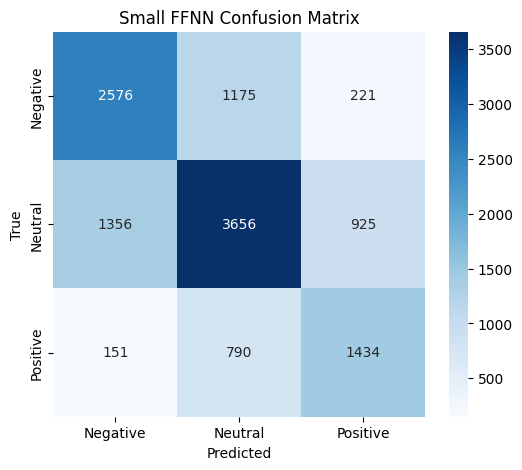


========= Mid FFNN (256-128) =========
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Validation Report ---
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       312
           1       0.61      0.68      0.64       869
           2       0.69      0.67      0.68       819

    accuracy                           0.63      2000
   macro avg       0.62      0.59      0.60      2000
weighted avg       0.63      0.63      0.63      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--- Test Report ---
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      3972
           1       0.65      0.62      0.63      5937
           2       0.56      0.61      0.58      2375

    accuracy                           0.62     12284
   macro avg       0.61      0.62      0.62     12284
weighted avg       0.63      0.62      0.63     12284



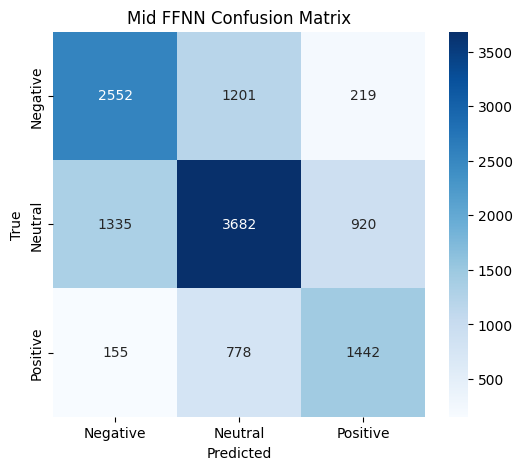


========= BatchNorm FFNN (256-128 with BatchNorm) =========
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
--- Validation Report ---
              precision    recall  f1-score   support

           0       0.57      0.44      0.50       312
           1       0.61      0.69      0.65       869
           2       0.69      0.66      0.67       819

    accuracy                           0.64      2000
   macro avg       0.62      0.59      0.61      2000
weighted avg       0.64      0.64      0.63      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--- Test Report ---
              precision    recall  f1-score   support

           0       0.62      0.65      0.63      3972
           1       0.65      0.61      0.63      5937
           2       0.56      0.61      0.58      2375

    accuracy                           0.62     12284
   macro avg       0.61      0.62      0.62     12284
weighted avg       0.62      0.62      0.62     12284



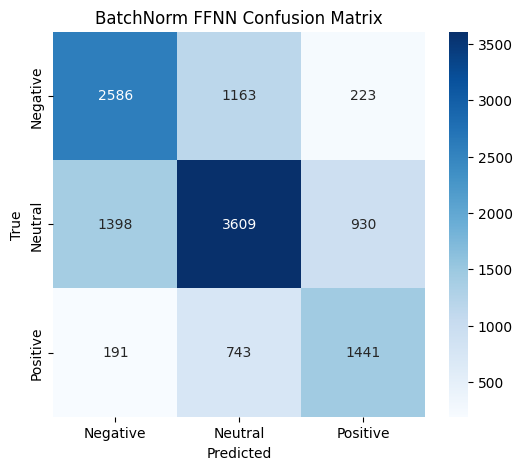

In [33]:

#MOSHKELLLLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA



# ================== AFTER ALL MODELS TRAINED ====================

# Prepare helper functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_val_labels = np.argmax(y_val, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Negative", "Neutral", "Positive"],
                yticklabels=["Negative", "Neutral", "Positive"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Small FFNN (GloVe input)
print("\n========= Small FFNN (128-64) =========")
y_val_pred = model_ffn_small.predict(X_val_ff)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
print("--- Validation Report ---")
print(classification_report(y_val_labels, y_val_pred_labels))

y_test_pred = model_ffn_small.predict(X_test_ff)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
print("--- Test Report ---")
print(classification_report(y_test_labels, y_test_pred_labels))
plot_conf_matrix(y_test_labels, y_test_pred_labels, "Small FFNN Confusion Matrix")

# ================== Evaluation of Models ====================

# Mid FFNN (GloVe input)
print("\n========= Mid FFNN (256-128) =========")
y_val_pred = model_ffn_mid.predict(X_val_ff)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
print("--- Validation Report ---")
print(classification_report(y_val_labels, y_val_pred_labels))

y_test_pred = model_ffn_mid.predict(X_test_ff)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
print("--- Test Report ---")
print(classification_report(y_test_labels, y_test_pred_labels))
plot_conf_matrix(y_test_labels, y_test_pred_labels, "Mid FFNN Confusion Matrix")

# BatchNorm FFNN (GloVe input)
print("\n========= BatchNorm FFNN (256-128 with BatchNorm) =========")
y_val_pred = model_ffn_batchnorm.predict(X_val_ff)
y_val_pred_labels = np.argmax(y_val_pred, axis=1)
print("--- Validation Report ---")
print(classification_report(y_val_labels, y_val_pred_labels))

y_test_pred = model_ffn_batchnorm.predict(X_test_ff)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
print("--- Test Report ---")
print(classification_report(y_test_labels, y_test_pred_labels))
plot_conf_matrix(y_test_labels, y_test_pred_labels, "BatchNorm FFNN Confusion Matrix")

In [34]:
def preprocess_for_rnn(text, synonym_aug=False, aug_prob=0.1):
    import re
    import emoji
    from nltk.tokenize import TweetTokenizer
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer

    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'never'}
    lemmatizer = WordNetLemmatizer()

    # Step 0: Expand contractions
    text = expand_contractions(text)

    # Step 1: Synonym Augmentation (optional)
    if synonym_aug:
        text = synonym_replace(text, prob=aug_prob)

    # Step 2: Demojize
    text = emoji.demojize(text)
    text = re.sub(r':([a-zA-Z0-9_]+):', r'emoji_\1', text)

    # Step 3: Remove URLs, mentions, and hashtags
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)

    # Step 4: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Step 5: Normalize ordinals
    text = normalize_ordinals(text)

    # Step 6: Remove numbers
    text = re.sub(r'\d+', '', text)

    # Step 7: Remove punctuations except ! and ?
    text = re.sub(r'[^\w\s!?]', '', text)
    text = text.replace('!', ' exclaim ')
    text = text.replace('?', ' question ')

    # Step 8: Reduce repeated characters
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # Step 9: Tokenize
    tokens = tokenizer.tokenize(text)

    # Step 10: Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

    # Step 11: Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(tokens)


In [35]:
# Preprocess your text
df_train['clean_text'] = df_train['text'].apply(lambda x: preprocess_for_rnn(x, synonym_aug=True))
df_val['clean_text'] = df_val['text'].apply(preprocess_for_rnn)
df_test['clean_text'] = df_test['text'].apply(preprocess_for_rnn)


In [36]:
# Tokenization and Padding
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(df_train['clean_text'])

X_train = tokenizer.texts_to_sequences(df_train['clean_text'])
X_train = pad_sequences(X_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_val = tokenizer.texts_to_sequences(df_val['clean_text'])
X_val = pad_sequences(X_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test = tokenizer.texts_to_sequences(df_test['clean_text'])
X_test = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Labels already prepared


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# RNN Baseline
model_rnn = Sequential([
    Embedding(input_dim=20000, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(units=128),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: positive, negative, neutral
])

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Train
history_rnn = model_rnn.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


713/713 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5147 - loss: 0.9734 - val_accuracy: 0.6135 - val_loss: 0.8322 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6482 - loss: 0.7852 - val_accuracy: 0.6385 - val_loss: 0.8496 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7341 - loss: 0.6299 - val_accuracy: 0.6450 - val_loss: 0.8217 - learning_rate: 0.0010
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8166 - loss: 0.4735 - val_accuracy: 0.6205 - val_loss: 0.9240 - learning_rate: 0.0010
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8761 - loss: 0.3315 - val_accuracy: 0.6035 - val_loss: 1.0361 - learning_rate: 0.0010
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9397 - loss: 0.1797 - val_accuracy: 0.6145 - val_loss: 1.3795 - learning_rate: 5.0000e-04


In [38]:
# Evaluate on test data
test_loss, test_acc = model_rnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5550 - loss: 0.9777
Test Loss: 0.9774, Test Accuracy: 0.5539


In [39]:
model_rnn_trial1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    SimpleRNN(units=64),  # Smaller RNN
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_rnn_trial1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_rnn_trial1 = model_rnn_trial1.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
test_loss1, test_acc1 = model_rnn_trial1.evaluate(X_test, y_test, verbose=1)
print(f"Trial 1 (Shallow RNN) - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_acc1:.4f}")


Epoch 1/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5527 - loss: 0.9382 - val_accuracy: 0.6050 - val_loss: 0.8323 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6850 - loss: 0.7219 - val_accuracy: 0.6130 - val_loss: 0.8452 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7945 - loss: 0.5181 - val_accuracy: 0.6290 - val_loss: 0.8555 - learning_rate: 0.0010
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5439 - loss: 0.9243
Trial 1 (Shallow RNN) - Test Loss: 0.9289, Test Accuracy: 0.5388


In [40]:
# Define a simple model for GloVe-Twitter averaged vectors
model_rnn_trial2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')  # 3 classes, one-hot labels
])

model_rnn_trial2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_rnn_trial2 = model_rnn_trial2.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    verbose=1
)

# Evaluate
test_loss2, test_acc2 = model_rnn_trial2.evaluate(X_test_ff, y_test, verbose=1)
print(f"Trial 2 (GloVe-Twitter) - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_acc2:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5370 - loss: 1.0526 - val_accuracy: 0.6180 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6034 - loss: 0.8868 - val_accuracy: 0.6205 - val_loss: 0.8460 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6085 - loss: 0.8632 - val_accuracy: 0.6145 - val_loss: 0.8379 - learning_rate: 0.0010
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5975 - loss: 0.8754
Trial 2 (GloVe-Twitter) - Test Loss: 0.8735, Test Accuracy: 0.6073


In [41]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)
class_weight_dict = dict(enumerate(class_weights))

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

# Define the model with class weights
model_rnn_trial3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_ff.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(y_train.shape[1], activation='softmax')
])

model_rnn_trial3.compile(optimizer='adam', 
                          loss='categorical_crossentropy', 
                          metrics=['accuracy'])

# Train with class weights
history_rnn_trial3 = model_rnn_trial3.fit(
    X_train_ff, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_ff, y_val),
    callbacks=[early_stop, lr_reduce],
    class_weight=class_weight_dict,  # This is the key addition
    verbose=1
)

# Evaluate
test_loss_weighted, test_acc_weighted = model_rnn_trial3.evaluate(X_test_ff, y_test, verbose=1)
print(f"Weighted Model - Test Loss: {test_loss_weighted:.4f}, Test Accuracy: {test_acc_weighted:.4f}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


713/713 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4865 - loss: 1.1097 - val_accuracy: 0.5560 - val_loss: 0.9756 - learning_rate: 0.0010
Epoch 2/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5620 - loss: 0.9293 - val_accuracy: 0.5820 - val_loss: 0.9026 - learning_rate: 0.0010
Epoch 3/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5774 - loss: 0.8925 - val_accuracy: 0.5840 - val_loss: 0.8967 - learning_rate: 0.0010
Epoch 4/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5739 - loss: 0.8835 - val_accuracy: 0.5935 - val_loss: 0.8874 - learning_rate: 0.0010
Epoch 5/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5733 - loss: 0.8779 - val_accuracy: 0.5645 - val_loss: 0.9106 - learning_rate: 0.0010
Epoch 6/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5754 - loss: 0.8749 - val_accuracy: 0.5990 - val_loss: 0.8740 - learning_rate: 0.0010
Epoch 7/50
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5793 - loss: 0.8709 - val_accurac


==================== Baseline RNN ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
--- Validation Set Classification Report (Baseline RNN) ---
              precision    recall  f1-score   support

    Negative       0.16      1.00      0.27       312
     Neutral       0.00      0.00      0.00       869
    Positive       0.00      0.00      0.00       819

    accuracy                           0.16      2000
   macro avg       0.05      0.33      0.09      2000
weighted avg       0.02      0.16      0.04      2000

 46/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
--- Test Set Classification Report (Baseline RNN) ---
              precision    recall  f1-score   support

    Negative       0.32      1.00      0.49      3972
     Neutral       0.57      0.00      0.00      5937
    Positive       0.00      0.00      0.00      2375

    accuracy                           0.32     12284
   macro avg       0.30      0.33      0.16     12284
weighted avg       0.38      0.32      0.16     12284



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


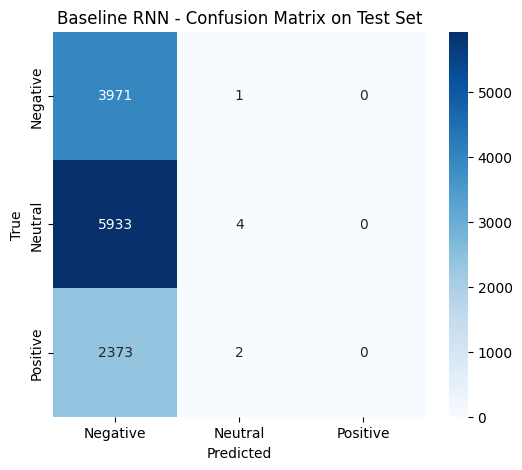


==================== Trial 1 (Shallow RNN) ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
--- Validation Set Classification Report (Trial 1 (Shallow RNN)) ---
              precision    recall  f1-score   support

    Negative       0.15      0.93      0.26       312
     Neutral       0.31      0.04      0.07       869
    Positive       0.00      0.00      0.00       819

    accuracy                           0.16      2000
   macro avg       0.16      0.32      0.11      2000
weighted avg       0.16      0.16      0.07      2000

 48/384 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
--- Test Set Classification Report (Trial 1 (Shallow RNN)) ---
              precision    recall  f1-score   support

    Negative       0.33      0.97      0.49      3972
     Neutral       0.43      0.04      0.07      5937
    Positive       0.00      0.00      0.00      2375

    accuracy                           0.33     12284
   macro avg       0.25      0.34      0.19     12284
weighted avg       0.32      0.33      0.19     12284



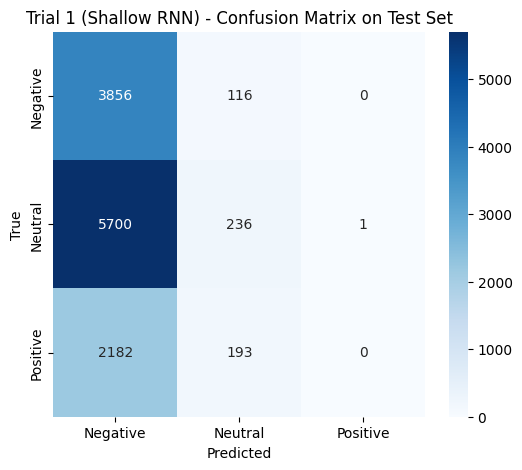


==================== Trial 2 (GloVe Vector RNN) ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Validation Set Classification Report (Trial 2 (GloVe Vector RNN)) ---
              precision    recall  f1-score   support

    Negative       0.53      0.42      0.47       312
     Neutral       0.60      0.67      0.63       869
    Positive       0.67      0.64      0.65       819

    accuracy                           0.62      2000
   macro avg       0.60      0.58      0.58      2000
weighted avg       0.62      0.62      0.62      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Test Set Classification Report (Trial 2 (GloVe Vector RNN)) ---
              precision    recall  f1-score   support

    Negative       0.58      0.72      0.65      3972
     Neutral       0.67      0.52      0.59      5937
    Positive       0.55      0.63      0.59      2375

    accuracy                           0.61     12284
   macro avg       0.60      0.62      0.61     12284
w

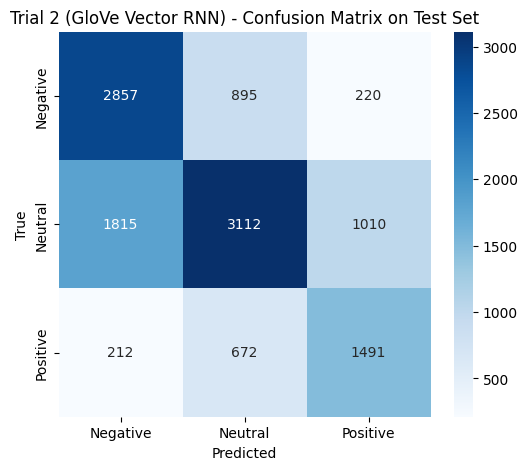


==================== Trial 3 (Class Weighted RNN) ====================
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Validation Set Classification Report (Trial 3 (Class Weighted RNN)) ---
              precision    recall  f1-score   support

    Negative       0.43      0.70      0.53       312
     Neutral       0.65      0.47      0.55       869
    Positive       0.66      0.69      0.68       819

    accuracy                           0.60      2000
   macro avg       0.58      0.62      0.59      2000
weighted avg       0.62      0.60      0.60      2000

384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Test Set Classification Report (Trial 3 (Class Weighted RNN)) ---
              precision    recall  f1-score   support

    Negative       0.53      0.85      0.65      3972
     Neutral       0.71      0.39      0.50      5937
    Positive       0.55      0.62      0.58      2375

    accuracy                           0.58     12284
   macro avg       0.60      0.62      0.58     1

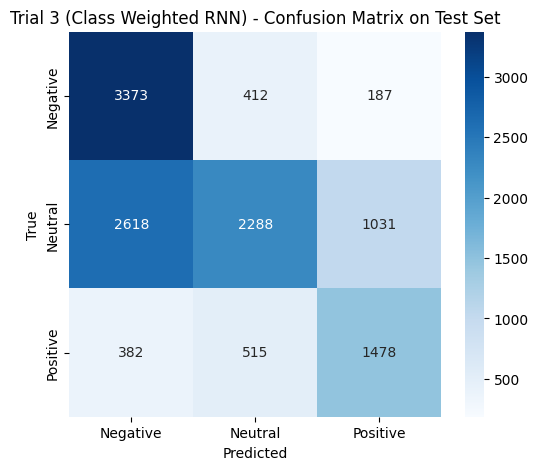

In [42]:
# RNN Models
rnn_models = {
    "Baseline RNN": model_rnn,
    "Trial 1 (Shallow RNN)": model_rnn_trial1,
    "Trial 2 (GloVe Vector RNN)": model_rnn_trial2,
    "Trial 3 (Class Weighted RNN)": model_rnn_trial3
}

for name, model_obj in rnn_models.items():
    print(f"\n==================== {name} ====================")
    
    if name == "Trial 2 (GloVe Vector RNN)" or "Trial 3 (Class Weighted RNN)" :
        y_val_pred = model_obj.predict(X_val_ff)
    else:
        y_val_pred = model_obj.predict(X_val)
        
    y_val_pred_labels = np.argmax(y_val_pred, axis=1)
    
    print(f"--- Validation Set Classification Report ({name}) ---")
    print(classification_report(y_val_labels, y_val_pred_labels, target_names=["Negative", "Neutral", "Positive"]))
    
    if name == "Trial 2 (GloVe Vector RNN)" or "Trial 3 (Class Weighted RNN)":
        y_test_pred = model_obj.predict(X_test_ff)
    else:
        y_test_pred = model_obj.predict(X_test)
        
    y_test_pred_labels = np.argmax(y_test_pred, axis=1)
    
    print(f"--- Test Set Classification Report ({name}) ---")
    print(classification_report(y_test_labels, y_test_pred_labels, target_names=["Negative", "Neutral", "Positive"]))
    
    plot_conf_matrix(y_test_labels, y_test_pred_labels, title=f"{name} - Confusion Matrix on Test Set")
